In [4]:
# Mehmet Fatih Yıldırım
# 150170062
#########################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import math
import random
#import any other non-machine learning modules that you wish
#SHORTCUTS: Alt + Enter includes new cell below, CTRL + Enter executes the current cell
##########################
df1 = pd.read_csv("train1.csv")
df2 = pd.read_csv("train2.csv")
#df2m = pd.read_csv("train2_modified.csv") # will be used in Part D

/tmp/ipykernel_7220/2306045905.py:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+alpha)
/tmp/ipykernel_7220/2306045905.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+alpha)


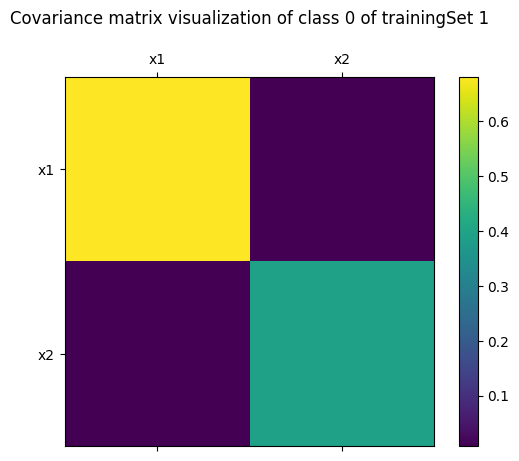

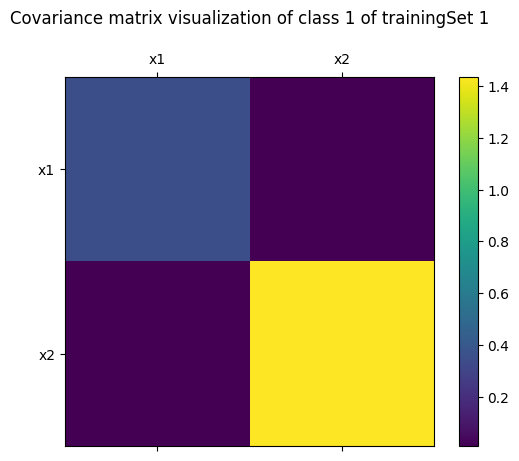

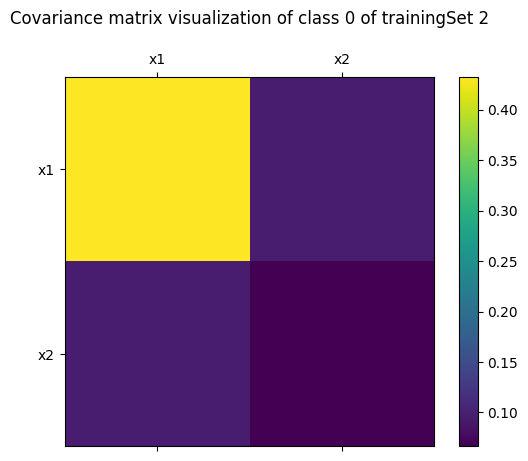

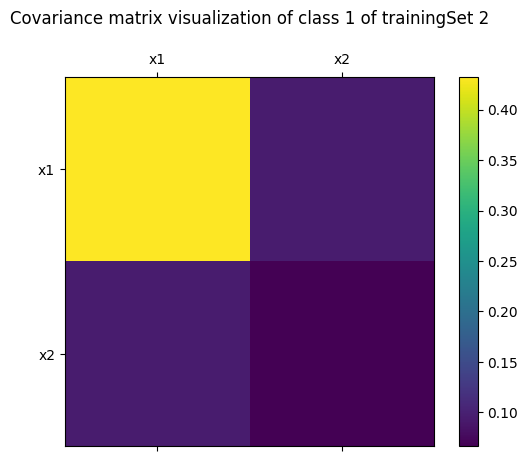

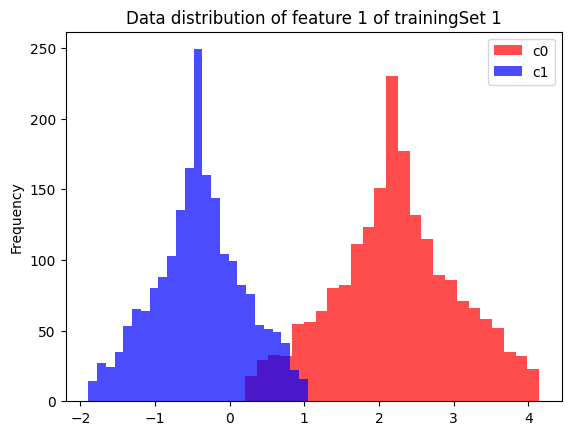

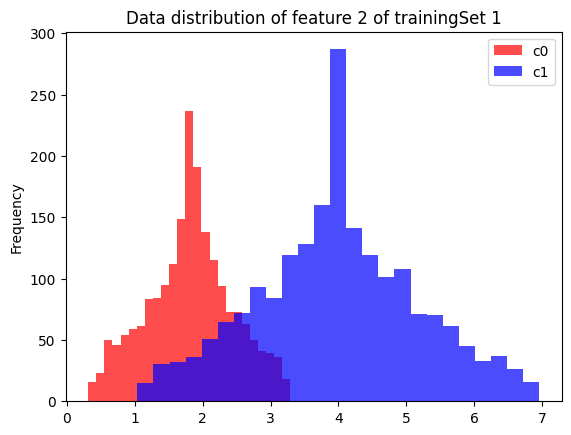

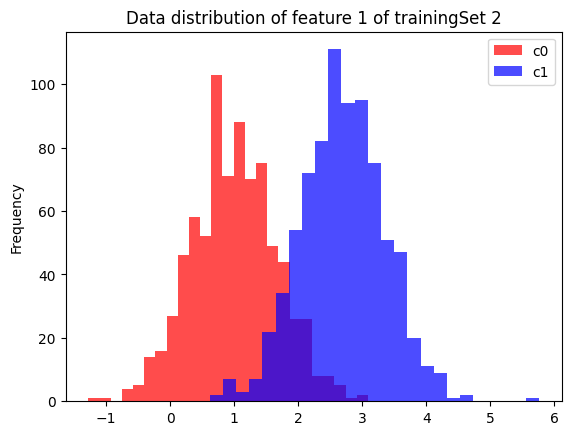

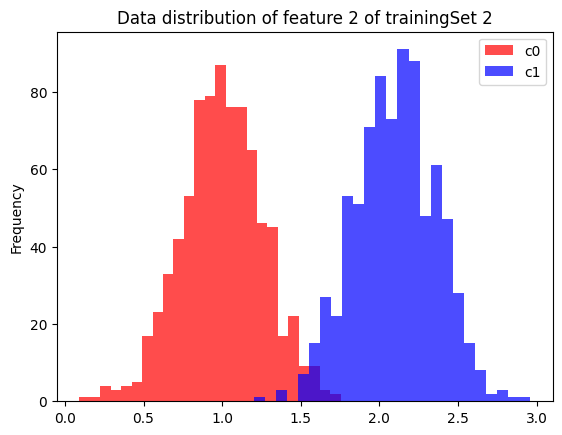

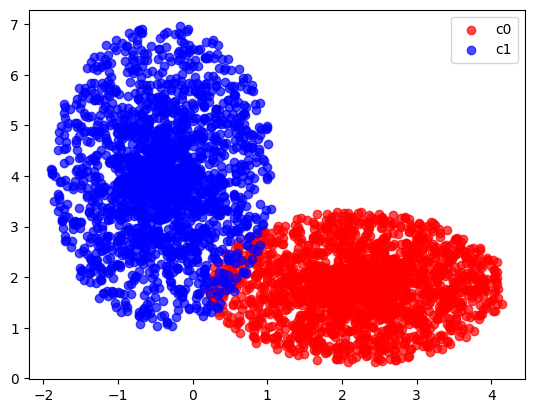

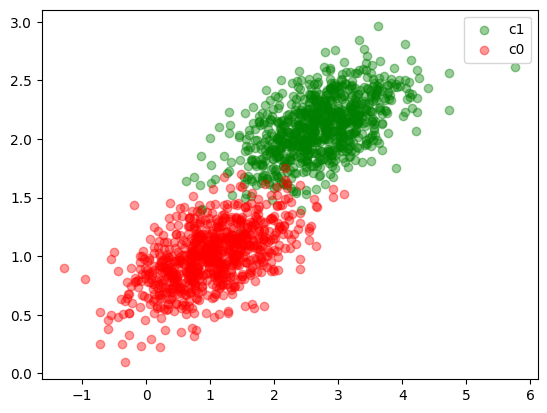

In [5]:
#PART A: Examine training sets here. plots etc.

# returns mean vector of the given class of a data frame - will also be used in Part B
def means(df):
    sum_x1 = 0
    sum_x2 = 0
    for index, row in df.iterrows():
        sum_x1 += row.x1
        sum_x2 += row.x2
    mean_x1 = sum_x1 / len(df)
    mean_x2 = sum_x2 / len(df)
    return [mean_x1, mean_x2]


# returns covariance matrix of the given class of a data frame
def cov_mat(df):
    # find mean of each column
    mean_x1, mean_x2 = means(df)
    
    # returns covariance of 2 columns
    def cov(featr1, mean1, featr2, mean2):
        concat_df = pd.concat([featr1, featr2], axis=1)
        sum = 0
        
        for index, row in concat_df.iterrows():
            sum += (row[0] - mean1) * (row[1] - mean2)
        return sum / len(featr1)
    #end_cov
    
    # create covariance matrix
    cov_mat = [[cov(df.x1, mean_x1, df.x1, mean_x1), cov(df.x1, mean_x1, df.x2, mean_x2)],
               [cov(df.x1, mean_x1, df.x2, mean_x2), cov(df.x2, mean_x2, df.x2, mean_x2)]]
    return cov_mat
#end_cov_mat

df1_class0 = df1[df1['y']==0]
df1_class1 = df1[df1['y']==1]
df2_class0 = df2[df2['y']==0]
df2_class1 = df2[df2['y']==1]

cov_mtrx_df1_class0 = cov_mat(df1_class0)
cov_mtrx_df1_class1 = cov_mat(df1_class1)
cov_mtrx_df2_class0 = cov_mat(df2_class0)
cov_mtrx_df2_class1 = cov_mat(df2_class1)


def plot_cov_mat(cov_mat, dataset, class_x):
    alpha = ['x1', 'x2']
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cov_mat,interpolation='nearest')
    plt.gca().set(title='Covariance matrix visualization of class {} of trainingSet {}\n'
                        .format(class_x, dataset))
    fig.colorbar(cax)
    ax.set_xticklabels(['']+alpha)
    ax.set_yticklabels(['']+alpha)


plot_cov_mat(cov_mtrx_df1_class0, 1, 0)
plot_cov_mat(cov_mtrx_df1_class1, 1, 1)
plot_cov_mat(cov_mtrx_df2_class0, 2, 0)
plot_cov_mat(cov_mtrx_df2_class1, 2, 1)
# A.2) Interpretation:
# Feature 2 is more scattered away than feature 1 as seen in covariance matrix plots 
# comparing the variances of them. Also, covariance of the two being very low shows that
# they are quite linearly independent.

# Feature 1, Set 1 - OLD 
# (after trying to do it this way for hours by playing around with parameters,
# I painfully found the other way, which should be used to get the histograms as in examples)
#plt.figure()
#hist = plt.hist([df1_class0.x1, df1_class1.x1],
#                bins=25,
#                color=["red", "blue"],
#                alpha=0.7,
#                label=["c0", "c1"],
#                rwidth=1)
#plt.gca().set(title='Data distribution of feature 1 of trainingSet 1', ylabel='Frequency')

# Feature 1, Set 1
plt.figure()
hist = plt.hist(df1_class0.x1,
                bins=25,
                color="red",
                alpha=0.7,
                label="c0")

hist = plt.hist(df1_class1.x1,
                bins=25,
                color="blue",
                alpha=0.7,
                label="c1")

plt.gca().set(title='Data distribution of feature 1 of trainingSet 1', ylabel='Frequency')
plt.legend(loc="upper right")


# Feature 2, Set 1
plt.figure()
hist = plt.hist(df1_class0.x2,
                bins=25,
                color="red",
                alpha=0.7,
                label="c0")

hist = plt.hist(df1_class1.x2,
                bins=25,
                color="blue",
                alpha=0.7,
                label="c1")

plt.gca().set(title='Data distribution of feature 2 of trainingSet 1', ylabel='Frequency')
plt.legend(loc="upper right")


# Feature 1, Set 2
plt.figure()
hist = plt.hist(df2_class0.x1,
                bins=25,
                color="red",
                alpha=0.7,
                label="c0")

hist = plt.hist(df2_class1.x1,
                bins=25,
                color="blue",
                alpha=0.7,
                label="c1")

plt.gca().set(title='Data distribution of feature 1 of trainingSet 2', ylabel='Frequency')
plt.legend(loc="upper right")


# Feature 2, Set 2
plt.figure()
hist = plt.hist(df2_class0.x2,
                bins=25,
                color="red",
                alpha=0.7,
                label="c0")

hist = plt.hist(df2_class1.x2,
                bins=25,
                color="blue",
                alpha=0.7,
                label="c1")

plt.gca().set(title='Data distribution of feature 2 of trainingSet 2', ylabel='Frequency')
plt.legend(loc="upper right")

# A.3) Interpretation:
# For both feature 1 and 2 of dataset 1; class 1 is a shifted version of the class 0.
# This causes their covariance matrices to be the same and their mean to be different.
# The most easily separable one is feature 1 of dataset 1 because the mean of its
# class 0's and 1's are distant from each other and they have little common area.

plt.figure()
scatter = plt.scatter(df1_class0.x1, df1_class0.x2,
                      color="red",
                      alpha=0.7,
                      label="c0")
scatter = plt.scatter(df1_class1.x1, df1_class1.x2,
                      color="blue",
                      alpha=0.7,
                      label="c1")
leg = plt.legend(loc="upper right")

plt.figure()
scatter = plt.scatter(df2_class1.x1, df2_class1.x2,
                      color="green",
                      alpha=0.4,
                      label="c1")
scatter = plt.scatter(df2_class0.x1, df2_class0.x2,
                      color="red",
                      alpha=0.4,
                      label="c0")
leg = plt.legend(loc="upper right")

In [6]:
#Implement PART B:

mean_vec_df1_class0 = means(df1_class0)
mean_vec_df1_class1 = means(df1_class1)
mean_vec_df2_class0 = means(df2_class0)
mean_vec_df2_class1 = means(df2_class1)


def roundMatrix(x):
    for i, row in enumerate(x):
        if type(row) == list:
            #print("list")
            for j, val in enumerate(row):
                x[i][j] = round(val, 10)
        else: # if vector
            #print("int")
            x[i] = round(row, 10)


roundMatrix(mean_vec_df1_class0)
roundMatrix(mean_vec_df1_class1)
roundMatrix(mean_vec_df2_class0)
roundMatrix(mean_vec_df2_class1)

roundMatrix(cov_mtrx_df1_class0)
roundMatrix(cov_mtrx_df1_class1)
roundMatrix(cov_mtrx_df2_class0)
roundMatrix(cov_mtrx_df2_class1)

print("Training Set 1, class 0:")
print("\tMean:")
print("\t\t", mean_vec_df1_class0)
print("\tCovariance Matrix:")
print("\t\t", cov_mtrx_df1_class0, end="\n\n")

print("Training Set 1, class 1:")
print("\tMean:")
print("\t\t", mean_vec_df1_class1)
print("\tCovariance Matrix:")
print("\t\t", cov_mtrx_df1_class1, end="\n\n")

print("Training Set 2, class 0:")
print("\tMean:")
print("\t\t", mean_vec_df2_class0)
print("\tCovariance Matrix:")
print("\t\t", cov_mtrx_df2_class0, end="\n\n")

print("Training Set 2, class 1:")
print("\tMean:")
print("\t\t", mean_vec_df2_class1)
print("\tCovariance Matrix:")
print("\t\t", cov_mtrx_df2_class1, end="\n\n")


def classProb(df):
    prob_class0 = len(df[df['y']==0]) / len(df)
    prob_class1 = len(df[df['y']==1]) / len(df)
    
    return prob_class0, prob_class1


prob_df1_class0, prob_df1_class1 = classProb(df1)
prob_df2_class0, prob_df2_class1 = classProb(df2)

# if needed, numpy.linalg.pinv(a, hermitian=False) can be used to find pseudoinverse.
def inv_2by2(x):
    a = x[0][0]
    b = x[0][1]
    c = x[1][0]
    d = x[1][1]
    det_x = a*d - b*c
    return [[d / det_x, -b / det_x], [-c / det_x, a / det_x]]


def mtrx_multply(x,y):
    zip_y = list(zip(*y))
    return [[sum(item_x * item_y for item_x, item_y in zip(row_x, col_y)) 
             for col_y in zip_y] for row_x in x]


def dot_prdct_2by1(x, y):
    return y[0][0] * x[0][0] + y[1][0] * x[0][1]


def transpose_of_mean(m):
    return [[x for [x] in m]]


def trainBayes(mean0, mean1, covmat0, covmat1, prob0, prob1):
    ln_prob0 = math.log(prob0)
    ln_prob1 = math.log(prob1)
    mean0 = [[x] for x in mean0]
    mean1 = [[x] for x in mean1]
    invcovmat0 = inv_2by2(covmat0)
    invcovmat1 = inv_2by2(covmat1)
    z0 = z1 = 0
    
    # a and b stands for those in y = ax + b
    
    if mean0 != mean1 and covmat0 == covmat1:
    # means are different but covariance matrices are equal
        a0 = mtrx_multply(transpose_of_mean(mean0), invcovmat0)
        b0 = ln_prob0 - 0.5 * mtrx_multply(transpose_of_mean(mean0),
                                           mtrx_multply(invcovmat0, mean0))[0][0]
        
        a1 = mtrx_multply(transpose_of_mean(mean1), invcovmat1)
        b1 = ln_prob1 - 0.5 * mtrx_multply(transpose_of_mean(mean1),
                                           mtrx_multply(invcovmat1, mean1))[0][0]
        
    elif (mean0 != mean1
          and covmat0[0][0] == covmat0[1][1]
          and covmat0[0][1] == 0 and covmat0[1][0] == 0
          and covmat1[0][0] == covmat1[1][1]
          and covmat1[0][1] == 0 and covmat1[1][0] == 0):
    # covariance matrix has constant variances across features
        if ln_prob0 == ln_prob1:
            a0 = mtrx_multply([-2], transpose_of_mean(mean0))
            b0 = dot_prdct_2by1(transpose_of_mean(mean0), mean0)
            
            a1 = mtrx_multply([-2], transpose_of_mean(mean1))
            b1 = dot_prdct_2by1(transpose_of_mean(mean1), mean1)
            
        else:
            variance0 = covmat0[0][0]
            variance1 = covmat1[0][0]
            
            a0 = mtrx_multply(transpose_of_mean(mean0), [1/variance0])
            b0 = dot_prdct_2by1(transpose_of_mean(mean0),
                                mean0) / (2 * variance0) + ln_prob0
            
            a1 = mtrx_multply(transpose_of_mean(mean1), [1/variance1])
            b1 = dot_prdct_2by1(transpose_of_mean(mean1),
                                mean1) / (2 * variance1) + ln_prob1
        
    else: #general case
        ln_det0 = math.log(covmat0[0][0] * covmat0[1][1] -
                           covmat0[0][1] * covmat0[1][0])
        ln_det1 = math.log(covmat1[0][0] * covmat1[1][1] -
                           covmat1[0][1] * covmat1[1][0])
        
        z0 = mtrx_multply([[-0.5, 0], [0, -0.5]], invcovmat0)
        a0 = mtrx_multply(transpose_of_mean(mean0), invcovmat0)
        b0 = (-0.5 * mtrx_multply(transpose_of_mean(mean0),
                                   mtrx_multply(invcovmat0, mean0))[0][0]
             - 0.5 * ln_det0 + ln_prob0)
        
        z1 = mtrx_multply([[-0.5, 0], [0, -0.5]], invcovmat1)
        a1 = mtrx_multply(transpose_of_mean(mean1), invcovmat1)
        b1 = (-0.5 * mtrx_multply(transpose_of_mean(mean1),
                                   mtrx_multply(invcovmat1, mean1))[0][0]
             - 0.5 * ln_det1 + ln_prob1)
    
    return z0, a0, b0, z1, a1, b1
    #return which class it belongs? no, let me decide that in another func


def classify(x, z0, a0, b0, z1, a1, b1):
    first_term0 = 0 if z0 == 0 else mtrx_multply(transpose_of_mean(x),
                                                 mtrx_multply(z0, x))[0][0]
    first_term1 = 0 if z1 == 0 else mtrx_multply(transpose_of_mean(x),
                                                 mtrx_multply(z1, x))[0][0]
    
    return 0 if (first_term0 + dot_prdct_2by1(a0, x) + b0
                 >
                 first_term1 + dot_prdct_2by1(a1, x) + b1) else 1


z0_df1, a0_df1, b0_df1, z1_df1, a1_df1, b1_df1 = trainBayes(mean_vec_df1_class0,
                                                            mean_vec_df1_class1,
                                                            cov_mtrx_df1_class0,
                                                            cov_mtrx_df1_class1,
                                                            prob_df1_class0,
                                                            prob_df1_class0)

z0_df2, a0_df2, b0_df2, z1_df2, a1_df2, b1_df2 = trainBayes(mean_vec_df2_class0,
                                                            mean_vec_df2_class1,
                                                            cov_mtrx_df2_class0,
                                                            cov_mtrx_df2_class1,
                                                            prob_df2_class0,
                                                            prob_df2_class0)

testSet1 = pd.read_csv("test1.csv")
testSet2 = pd.read_csv("test2.csv")


def calculateError(testSet, z0, a0, b0, z1, a1, b1):
    error_count = 0
    for i, row in testSet.iterrows():
        new_sample = [[row.x1], [row.x2]]
        if classify(new_sample, z0, a0, b0, z1, a1, b1) != row.y:
            error_count += 1
    
    return error_count / len(testSet) * 100


print("Test Set 1 Error: ", calculateError(testSet1, z0_df1, a0_df1, b0_df1,
                                           z1_df1, a1_df1, b1_df1), "%.")
print("Test Set 2 Error: ", calculateError(testSet2, z0_df2, a0_df2, b0_df2,
                                           z1_df2, a1_df2, b1_df2), "%.")

Training Set 1, class 0:
	Mean:
		 [2.2176959609, 1.8168219169]
	Covariance Matrix:
		 [[0.6805779611, 0.0081864072], [0.0081864072, 0.3927111699]]

Training Set 1, class 1:
	Mean:
		 [-0.4065729711, 3.9731142152]
	Covariance Matrix:
		 [[0.353629824, 0.0090674783], [0.0090674783, 1.4373903332]]

Training Set 2, class 0:
	Mean:
		 [1.0, 1.0]
	Covariance Matrix:
		 [[0.4327385304, 0.094326219], [0.094326219, 0.0666625799]]

Training Set 2, class 1:
	Mean:
		 [2.7, 2.1]
	Covariance Matrix:
		 [[0.4327916073, 0.0941662641], [0.0941662641, 0.0665847398]]

Test Set 1 Error:  1.2 %.
Test Set 2 Error:  2.0 %.


In [7]:
#Implement PART C:

d1 = pd.concat([df1, testSet1])
d2 = pd.concat([df2, testSet2])

from sklearn.model_selection import KFold

kf = KFold(n_splits=5) # Define the split - into 5 folds 

# dataFrame 1
kf.get_n_splits(d1) # returns the number of splitting iterations in the cross-validator
KFold(n_splits=5, random_state=None, shuffle=False) # looking back on 2020-06-11 and I guess this line was unnecessary - actually, it doesn't do anything

averageError1 = 0
for train_index, test_index in kf.split(d1):
    test_count = int(len(d1) / 5)
    train_count = int(len(d1) - test_count)
    
    train_begin = train_index[0]
    test_begin = test_index[0]
    
    dtr1 = d1.iloc[train_begin:train_begin+train_count]
    dts1 = d1.iloc[test_begin:test_begin+test_count]
    
    dtr1_class0 = dtr1[dtr1['y']==0]
    dtr1_class1 = dtr1[dtr1['y']==1]
    
    cov_mtrx_dtr1_class0 = cov_mat(dtr1_class0)
    cov_mtrx_dtr1_class1 = cov_mat(dtr1_class1)
    
    mean_vec_dtr1_class0 = means(dtr1_class0)
    mean_vec_dtr1_class1 = means(dtr1_class1)
    
    roundMatrix(mean_vec_dtr1_class0)
    roundMatrix(mean_vec_dtr1_class1)
    
    roundMatrix(cov_mtrx_dtr1_class0)
    roundMatrix(cov_mtrx_dtr1_class1)
    
    prob_dtr1_class0, prob_dtr1_class1 = classProb(dtr1)
    
    z0_dtr1, a0_dtr1, b0_dtr1, z1_dtr1, a1_dtr1, b1_dtr1 = trainBayes(mean_vec_dtr1_class0,
                                                                      mean_vec_dtr1_class1,
                                                                      cov_mtrx_dtr1_class0,
                                                                      cov_mtrx_dtr1_class1,
                                                                      prob_dtr1_class0,
                                                                      prob_dtr1_class0)
    
    averageError1 += calculateError(dts1, z0_dtr1, a0_dtr1, b0_dtr1, z1_dtr1, a1_dtr1, b1_dtr1)
#end_for
averageError1 /= 5
print("5-fold average dataSet 1 error: ", averageError1)


# dataFrame 2
kf.get_n_splits(d2) # returns the number of splitting iterations in the cross-validator
KFold(n_splits=5, random_state=None, shuffle=False)

averageError2 = 0
for train_index, test_index in kf.split(d2):
    test_count = int(len(d2) / 5)
    train_count = int(len(d2) - test_count)
    
    train_begin = train_index[0]
    test_begin = test_index[0]
    
    dtr2 = d2.iloc[train_begin:train_begin+train_count]
    dts2 = d2.iloc[test_begin:test_begin+test_count]
    
    dtr2_class0 = dtr2[dtr2['y']==0]
    dtr2_class1 = dtr2[dtr2['y']==1]
    
    cov_mtrx_dtr2_class0 = cov_mat(dtr2_class0)
    cov_mtrx_dtr2_class1 = cov_mat(dtr2_class1)
    
    mean_vec_dtr2_class0 = means(dtr2_class0)
    mean_vec_dtr2_class1 = means(dtr2_class1)
    
    roundMatrix(mean_vec_dtr2_class0)
    roundMatrix(mean_vec_dtr2_class1)
    
    roundMatrix(cov_mtrx_dtr2_class0)
    roundMatrix(cov_mtrx_dtr2_class1)
    
    prob_dtr2_class0, prob_dtr2_class1 = classProb(dtr2)
    
    z0_dtr2, a0_dtr2, b0_dtr2, z1_dtr2, a1_dtr2, b1_dtr2 = trainBayes(mean_vec_dtr2_class0,
                                                                      mean_vec_dtr2_class1,
                                                                      cov_mtrx_dtr2_class0,
                                                                      cov_mtrx_dtr2_class1,
                                                                      prob_dtr2_class0,
                                                                      prob_dtr2_class0)
    
    averageError2 += calculateError(dts2, z0_dtr2, a0_dtr2, b0_dtr2, z1_dtr2, a1_dtr2, b1_dtr2)
#end_for
averageError2 /= 5
print("5-fold average dataSet 2 error: ", averageError2)


# C.4) Interpretation:
# CV should be more reliable because it uses 5 different parts of the data to test -and
# of course 5 different sets to train. Here, the results didn't change too much in this
# case but with respect to which single split of the dataset is chosen for testing, non-CV
# could go really wrong.

5-fold average dataSet 1 error:  1.3
5-fold average dataSet 2 error:  1.55


In [8]:
#Implement Part D:

df2m_class0 = df2m[df2m['y']==0]
df2m_class1 = df2m[df2m['y']==1]

# For the following 2 plots, which class is above the other is different.
# This is not a mistake. It's on purpose. It is so, in order to better indicate the points.
plt.figure()
scatter = plt.scatter(df2m_class1.x1, df2m_class1.x2,
                      color="blue",
                      alpha=0.45,
                      label="c1")
scatter = plt.scatter(df2m_class0.x1, df2m_class0.x2,
                      color="green",
                      alpha=0.45,
                      label="c0")
leg = plt.legend(loc='upper right')

# unmodified class 2 plot again to easily compare
plt.figure()
scatter = plt.scatter(df2_class0.x1, df2_class0.x2,
                      color="red",
                      alpha=0.45,
                      label="c0")
scatter = plt.scatter(df2_class1.x1, df2_class1.x2,
                      color="blue",
                      alpha=0.45,
                      label="c1")
leg = plt.legend(loc='upper right')


df2m_class0 = df2m[df2m['y']==0]
df2m_class1 = df2m[df2m['y']==1]

cov_mtrx_df2m_class0 = cov_mat(df2m_class0)
cov_mtrx_df2m_class1 = cov_mat(df2m_class1)

mean_vec_df2m_class0 = means(df2m_class0)
mean_vec_df2m_class1 = means(df2m_class1)

roundMatrix(mean_vec_df2m_class0)
roundMatrix(mean_vec_df2m_class1)

roundMatrix(cov_mtrx_df2m_class0)
roundMatrix(cov_mtrx_df2m_class1)

prob_df2m_class0, prob_df2m_class1 = classProb(df2m)

z0_df2m, a0_df2m, b0_df2m, z1_df2m, a1_df2m, b1_df2m = trainBayes(mean_vec_df2m_class0,
                                                                  mean_vec_df2m_class1,
                                                                  cov_mtrx_df2m_class0,
                                                                  cov_mtrx_df2m_class1,
                                                                  prob_df2m_class0,
                                                                  prob_df2m_class0)

print("Test Set 2-Modified Error: ", calculateError(testSet2, z0_df2m, a0_df2m, b0_df2m,
                                                    z1_df2m, a1_df2m, b1_df2m), "%.")

# D.1) In modified version there are a bunch of other points -so-called outliers- which
# lie far away.

# D.3) Error rate being a bit higher for modified version concludes that Bayes classifier
# is reasonably affected by outliers because it does not have a special mechanism to
# handle them.

NameError: name 'df2m' is not defined

In [ ]:
# Additional space for your general comments about HW and Bayes Classifier

# At first, the homework seemed really really hard because I had previous experience about
# basically none of the concepts or libraries, etc. that the homework involves.
# Neither Jupyter Notebook, nor pandas, nor matplotlib, ...
# So it took a considerably large amount of time to figure out the things required for part A.2).
# For the rest, we'll see.. :)

# I struggled a little for part B.2 as well. But it worked out at the end.
# The rest wasn't that hard, just copy-pasting and editing a little - as it was in previous parts. :)

# This hw added a lot to me about how python, pandas, matplotlib, sympy, etc. work.
# But a really important one is: "Always use ndarray to represent vectors and matrices!"

# Overall, it was a good experience. Thanks..

In [ ]:
# a little trial about how Python works
a = 3
b = 5
def foo(a, b):
    c = a + b
    def bar(c):
        print(c)
    bar(c)
foo(a, b)

In [ ]:
# a little trial about how pandas.melt works
df = pd.DataFrame({"a" : [4 ,5, 6],
                   "b" : [7, 8, 9],
                   "c" : [10, 11, 12]},
                  index = [1, 2, 3])
print(df)
print(pd.melt(df))

In [ ]:
# some other trial about how Python and its libraries work
a = [[0, 1], [2, 3]]
b = [[0, 1], [2, 3]]

print(a==b)

print(round(1.3479557634572659723, 10))
#print(round([0.2342423442344244, 1.234234234234], 10))

a = [[0.234234134234, 1.415534255342355235], [2.23640172355365, 3.24691232352354]]
c = roundMatrix(a)
print(c)

a = 3
print(type(a), type(b))
print(type(a) == int, type(b) == list)

def foo():
    return [3, 5]

a, b = foo()
print(a, b)


from sympy import Eq, Symbol, solve

print("-----------")
v = Symbol('v')
solve(Eq(v**2, v+2), v)

a = [[0, 1], [2, 3]]
b = [[0, 1], [2, 3]]

#print(a*b)

print(inv_2by2(a))

print(3*a)

print(mtrx_multply(a, b))

c = [0, 1]
print(*c)
c = [[x] for x in c]
print(c)

tr_c = transpose_of_mean(c)
print(tr_c)

x = [[0, 1]]
y = [[0], [1]]
dot_prdct_2by1(x, y)

X = [1, 2, 3, 4, 5, 6, 7, 8]
#X = [[1, 2], [3, 4], [5, 6], [7, 8]] # create an array
#y = np.array([1, 2, 3, 4]) # Create another array
kf = KFold(n_splits=2) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf.get_n_splits(X))
KFold(n_splits=2, random_state=None, shuffle=False)

for train_index, test_index in kf.split(X):
    print("\nTRAIN:", train_index[0], train_index[-1], "TEST:", test_index[0], test_index[-1])
    X_train, X_test = X[train_index[0]:train_index[-1]+1], X[test_index[0]:test_index[-1]+1]
    #y_train, y_test = y[train_index], y[test_index]
    print(X_train, "\n---->>\n", X_test)

#('TRAIN:', array([2, 3]), 'TEST:', array([0, 1]))
#('TRAIN:', array([0, 1]), 'TEST:', array([2, 3]))